# Exploratory Data Analysis

This exploratory data analysis seeks to determine if there is any bias in the Seattle Police Department's use of Terry Stops. Some areas I want to explore are how individual police beats are related to stops, the idea being that denser or lower income areas of the city may have more stops and/or arrests. I also want to look at if Race plays a part in the number of stops/arrests made. I want to compare the percentage of stops by race with the Seattle's population demographics. I would also like to see if the presence of weapons affects a stop as well. 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CSV/terry_stops_eda.csv')

In [3]:
df.columns

Index(['subj_age_group', 'subj_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon', 'off_id', 'off_gender', 'off_race',
       'subj_perceived_race', 'subj_perceived_gender', 'init_call_type',
       'final_call_type', 'call_type', 'off_squad', 'arrest_flag',
       'frisk_flag', 'precinct', 'sector', 'beat', 'reported_year',
       'reported_month', 'reported_day', 'reported_hour', 'off_age',
       'specific_beat'],
      dtype='object')

---

### Stop Resolutions: Target Variable Distribution

In [4]:
num_arrests = df.stop_resolution.value_counts()[2]
num_non_arrests = sum(df.stop_resolution.value_counts()[:2])+sum(df.stop_resolution.value_counts()[3:])

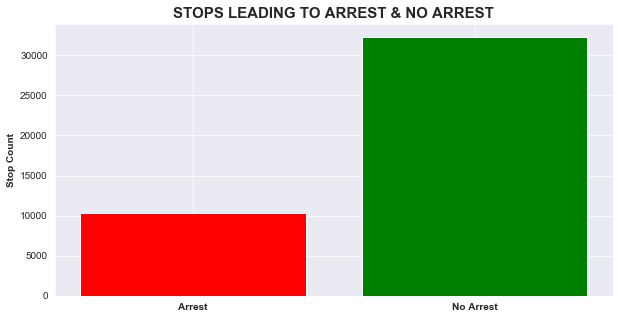

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
plt.bar(['1','0'], [num_arrests, num_non_arrests], color=['red', 'green'])
plt.title('STOPS LEADING TO ARREST & NO ARREST', fontdict={'fontweight':'bold', 'fontsize':15})
plt.xticks(ticks=[0,1], labels=['Arrest','No Arrest'], weight='bold')
plt.ylabel('Stop Count', weight='bold')
plt.show()

In [6]:
year = df.groupby(['reported_year','stop_resolution']).stop_resolution.count()
arrest = [year[0], year[5], year[10], year[15], year[20], year[25]]
no_arrest = [year[1:5].sum(), year[6:10].sum(), year[11:15].sum(), year[16:20].sum(), year[21:25].sum(), year[25:].sum()]
years = ['2015', '2016', '2017', '2018', '2019', '2020']

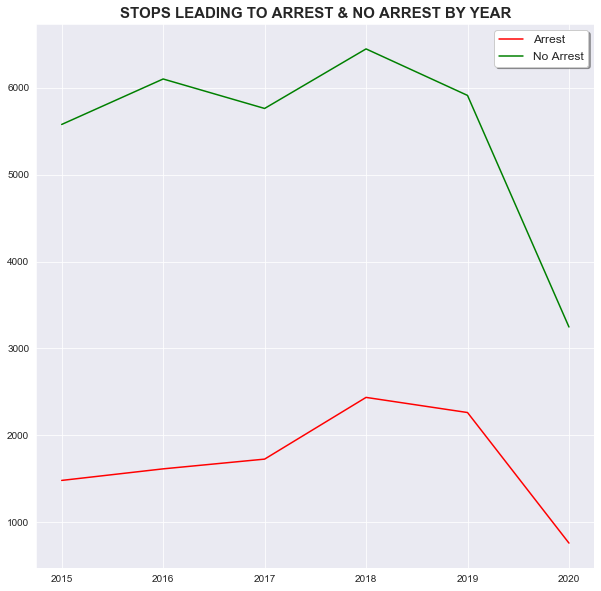

In [7]:
plt.figure(figsize=(10,10))
p1 = plt.plot(years, arrest, color='red')
p2 = plt.plot(years, no_arrest, color='green') # bottom=arrest
plt.title('STOPS LEADING TO ARREST & NO ARREST BY YEAR', fontweight='bold', fontsize=15)
plt.legend(['Arrest', 'No Arrest'], fontsize='large', shadow=True, facecolor='white')
plt.show()

---

### Stop Resolutions

Showing the totals for all stop resolutions

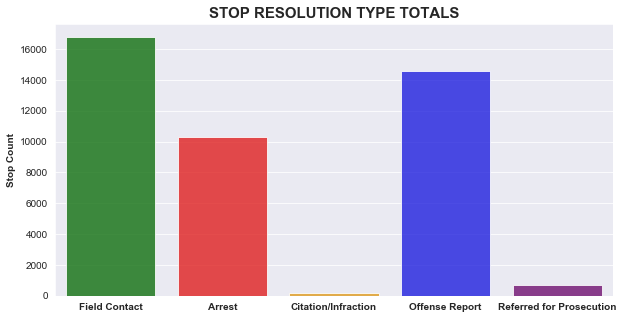

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df.stop_resolution, alpha =.80, palette=['green','red','orange','blue','purple'])
plt.title('STOP RESOLUTION TYPE TOTALS', fontdict={'fontweight':'bold', 'fontsize':15})
plt.xticks(ticks=[0,1,2,3,4], labels=['Field Contact','Arrest', 'Citation/Infraction', 'Offense Report', 'Referred for Prosecution'], weight='bold')
plt.ylabel('Stop Count', weight='bold')
plt.xlabel('')
plt.show()

Stop resolutions by year

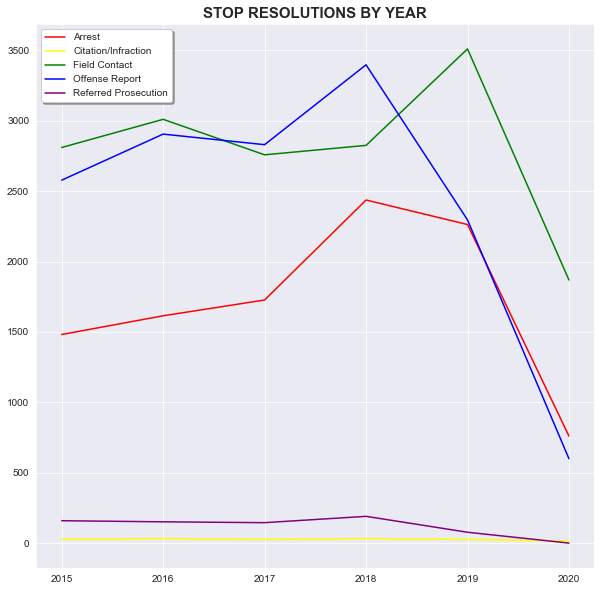

In [9]:
citation_infraction = [year[1], year[6], year[11], year[16], year[21], year[26]]
field_contact = [year[2], year[7], year[12], year[17], year[22], year[27]]
offense_report = [year[3], year[8], year[13], year[18], year[23], year[28]]
referred_prosecution = [year[4], year[9], year[14], year[19], year[24], year[29]]
legend_stop_res = ['Arrest', 'Citation/Infraction', 'Field Contact', 'Offense Report', 'Referred Prosecution']

plt.figure(figsize=(10,10))
l1 = plt.plot(years, arrest, color='red')
l2 = plt.plot(years, citation_infraction, color='yellow')
l3 = plt.plot(years, field_contact, color='green')
l4 = plt.plot(years, offense_report, color='blue')
l5 = plt.plot(years, referred_prosecution, color='purple')
plt.title('STOP RESOLUTIONS BY YEAR', fontweight='bold', fontsize=15)
plt.legend(legend_stop_res, shadow=True, facecolor='white')
plt.show()

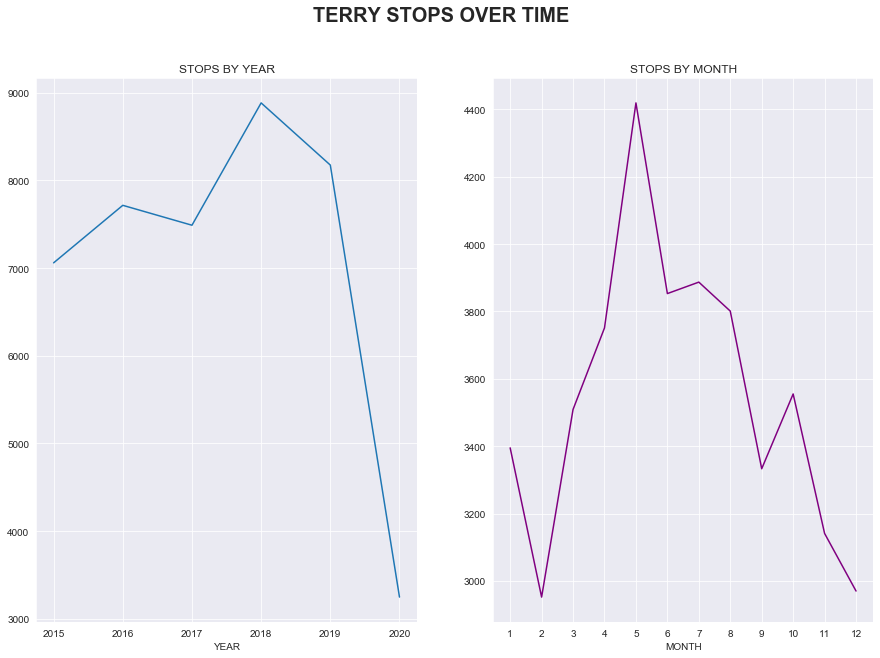

In [10]:
stops_year = df.reported_year.value_counts().sort_index()
stops_month = df.reported_month.value_counts().sort_index()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
plt.suptitle('TERRY STOPS OVER TIME', fontweight='bold', fontsize=20)
ax1.plot(stops_year)
ax1.title.set_text('STOPS BY YEAR')
ax1.set_xlabel('YEAR')
ax2.plot(stops_month, color='purple')
ax2.title.set_text('STOPS BY MONTH')
ax2.set_xlabel('MONTH')
plt.xticks(range(1,13))
plt.show()

---

### Call Types

In [11]:
print('{} {}'.format('Initial/Final Call Type Empty Values:', df.init_call_type.isna().sum()))
print('{} {}'.format('Initial/Final Call Type Length:', len(df.init_call_type)))
print('{} {}\n'.format('Initial/Final Call Percent N/A:', df.init_call_type.isna().sum()/len(df.init_call_type)))
print('{}\n{}\n{}\n{}\n'.format('---'*15, 'Top 20 Initial Call Types: ', '---'*15, df.init_call_type.value_counts()[1:21]))
print('{}\n{}\n{}\n{}'.format('---'*15, 'Top 20 Final (Officer Determined) Call Types: ', '---'*15, df.final_call_type.value_counts()[1:21]))
print('\n{}\n{}\n{}\n{}'.format('---'*15, 'How Call Was Made:', '---'*15, df.call_type.value_counts()))

Initial/Final Call Type Empty Values: 12802
Initial/Final Call Type Length: 42566
Initial/Final Call Percent N/A: 0.30075647230183716

---------------------------------------------
Top 20 Initial Call Types: 
---------------------------------------------
SUSPICIOUS PERSON, VEHICLE OR INCIDENT              2636
DISTURBANCE, MISCELLANEOUS/OTHER                    2199
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)      1768
TRESPASS                                            1678
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)           1260
SHOPLIFT - THEFT                                    1158
FIGHT - IP - PHYSICAL (NO WEAPONS)                  1150
WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)      1033
ROBBERY - IP/JO (INCLUDES STRONG ARM)                784
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)     655
BURG - IP/JO - RES (INCL UNOCC STRUCTURES)           645
DIST - IP/JO - DV DIST - NO ASLT                     627
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)        614
PROP

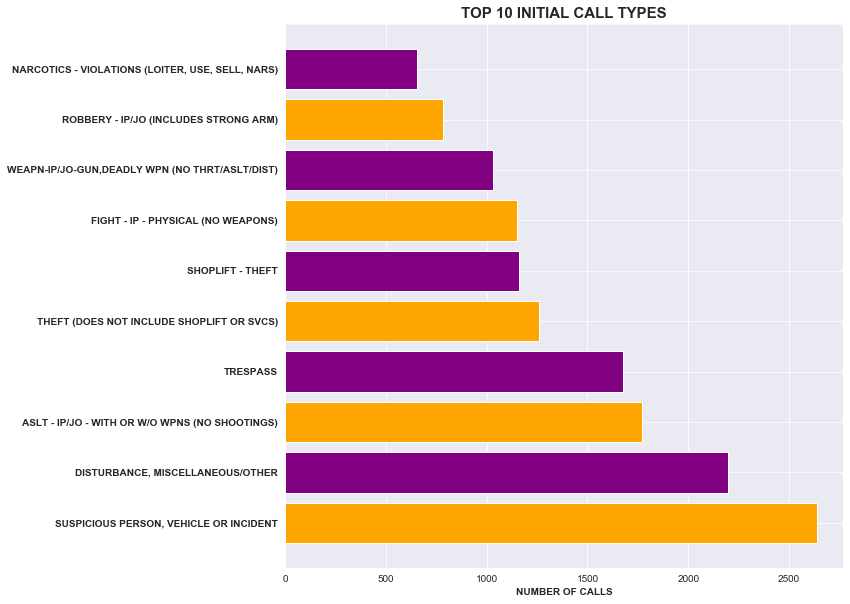

In [12]:
init_call_names = df.init_call_type.value_counts()[1:11].index
init_call_values = df.init_call_type.value_counts()[1:11].values
plt.figure(figsize=(10,10))
plt.barh(init_call_names, init_call_values, color=['orange', 'purple'])
plt.yticks(fontweight='bold')
plt.title('TOP 10 INITIAL CALL TYPES', fontweight='bold', fontsize=15)
plt.xlabel('NUMBER OF CALLS', fontweight='bold')
plt.show()

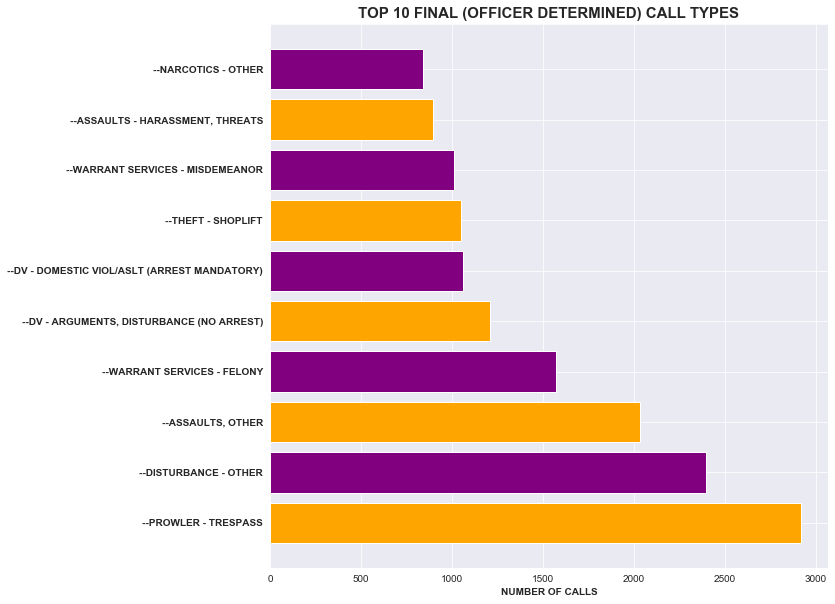

In [13]:
final_call_names = df.final_call_type.value_counts()[1:11].index
final_call_values = df.final_call_type.value_counts()[1:11].values
plt.figure(figsize=(10,10))
plt.barh(final_call_names, final_call_values, color=['orange', 'purple'])
plt.yticks(fontweight='bold')
plt.title('TOP 10 FINAL (OFFICER DETERMINED) CALL TYPES', fontweight='bold', fontsize=15)
plt.xlabel('NUMBER OF CALLS', fontweight='bold')
plt.show()

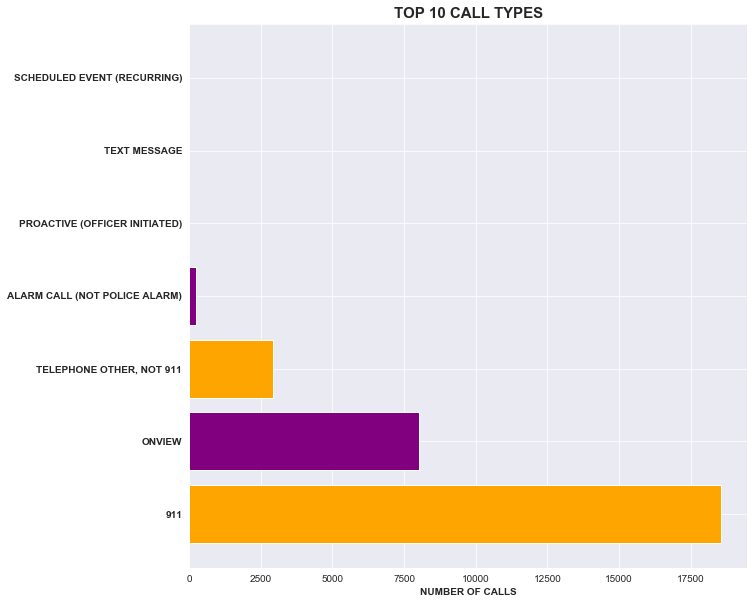

In [14]:
plt.figure(figsize=(10,10))
plt.barh(df.call_type.value_counts().index, df.call_type.value_counts().values, color=['orange', 'purple'])
plt.yticks(fontweight='bold')
plt.title('TOP 10 CALL TYPES', fontweight='bold', fontsize=15)
plt.xlabel('NUMBER OF CALLS', fontweight='bold')
plt.show()

# Beats

In further researching information from the graph below I found a kmz file (map) of Seattle's police beats. I also found a displacement risk graph from Seattle's Department of Planning and Development (https://www.seattle.gov/dpd/cs/groups/pan/@pan/documents/web_informational/p2273984.pdf). In comparing the two I found that the beats with the most stops corresponded with areas of high displacement risk.

In [15]:
print('{} {}'.format('N/A:', df.specific_beat.isna().sum()))
print('{} {}'.format('Total Values:', len(df.specific_beat)))
print('{} {}'.format('% Missing:', df.specific_beat.isna().sum()/len(df.specific_beat)))

N/A: 9741
Total Values: 42566
% Missing: 0.22884461777005122


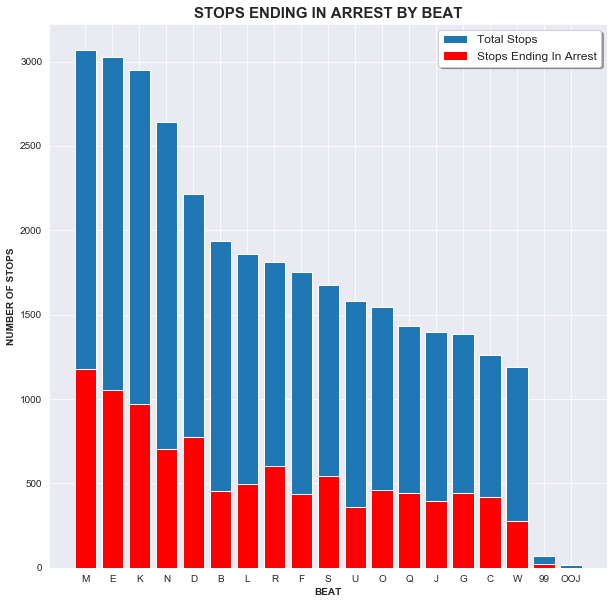

In [16]:
beat_total = df.beat.value_counts()
beat_arrest = df[df.stop_resolution == 'Arrest'].beat.value_counts()

plt.figure(figsize=(10,10))
plot_1 = plt.bar(beat_total.index, beat_total.values)
plot_2 = plt.bar(beat_arrest.index, beat_arrest.values, color='red')
plt.xlabel('BEAT', fontweight='bold')
plt.ylabel('NUMBER OF STOPS', fontweight='bold')
plt.title('STOPS ENDING IN ARREST BY BEAT', fontweight='bold', fontsize=15)
plt.legend(['Total Stops','Stops Ending In Arrest'], fontsize='large', shadow=True, facecolor='white')
plt.show()

---

# OFFICERS INFO

---

### Stops by officer and arrests

The officer age graph shows a positive skew. A standard scaler may be needed in order to normalize the graph for use in modeling. 

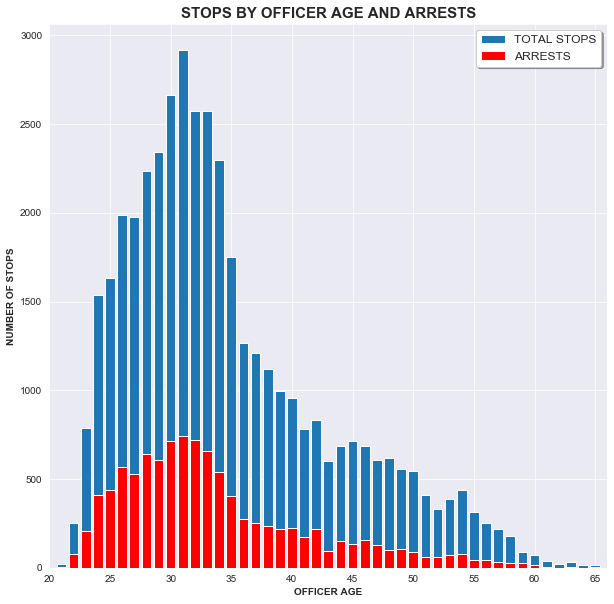

In [17]:
off_age_arrests = df[df.stop_resolution == 'Arrest'].off_age.value_counts()
off_age_total = df.off_age.value_counts()

plt.figure(figsize=(10,10))
plt.title('STOPS BY OFFICER AGE AND ARRESTS', fontweight='bold', fontsize=15)
plt.bar(off_age_total.index, off_age_total.values)
plt.bar(off_age_arrests.index, off_age_arrests.values, color='red')
plt.legend(['TOTAL STOPS', 'ARRESTS'], facecolor='white', shadow=True, fontsize='large')
plt.xticks(range(20,67,5))
plt.xlabel('OFFICER AGE', fontweight='bold')
plt.ylabel('NUMBER OF STOPS', fontweight='bold')
plt.xlim(20,66)
plt.show()

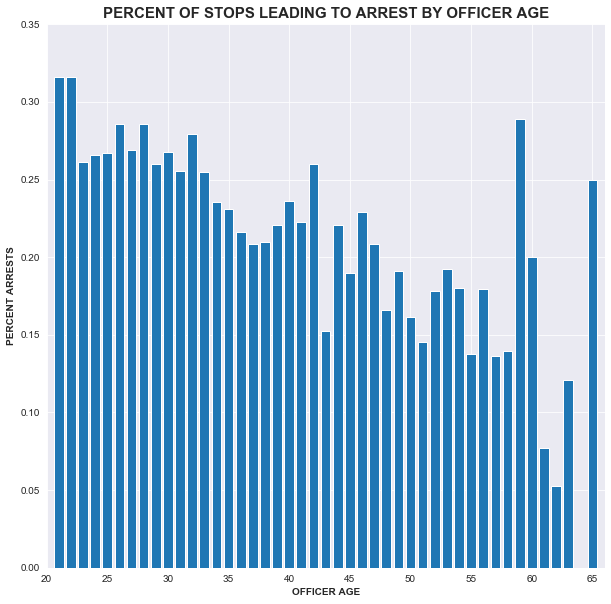

In [18]:
plt.figure(figsize=(10,10))
plt.title('PERCENT OF STOPS LEADING TO ARREST BY OFFICER AGE', fontweight='bold', fontsize=15)
pct_off_age_arrests = off_age_arrests/off_age_total
plt.bar(pct_off_age_arrests.index, pct_off_age_arrests.values)
plt.ylabel('PERCENT ARRESTS', fontweight='bold')
plt.xlabel('OFFICER AGE', fontweight='bold')
plt.xticks(range(20,67,5))
plt.xlim(20,66)
plt.show()

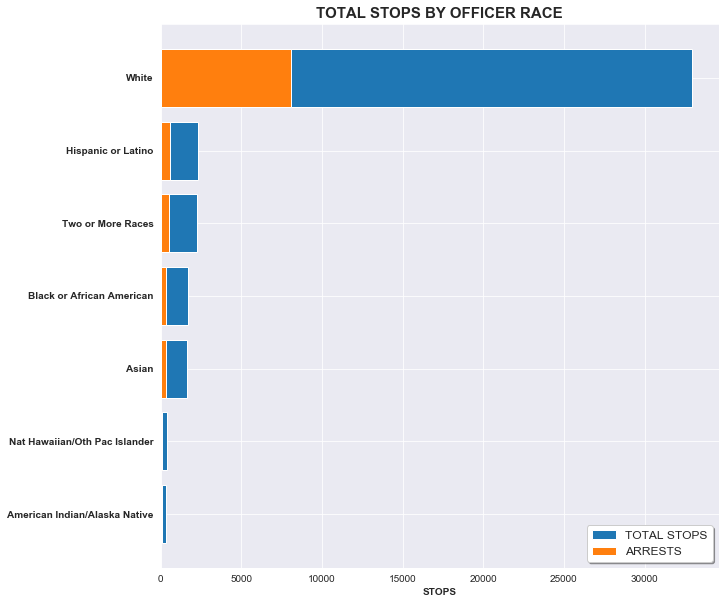

In [19]:
off_race_total = df.off_race.value_counts().sort_values(ascending=True)
off_race_arrest = df[df.stop_resolution == 'Arrest'].off_race.value_counts()
plt.figure(figsize=(10,10))
plt.title('TOTAL STOPS BY OFFICER RACE', fontweight='bold', fontsize=15)
plt.barh(off_race_total.index, off_race_total.values)
plt.barh(off_race_arrest.index, off_race_arrest.values)
plt.yticks(fontweight='bold')
plt.xlabel('STOPS', fontweight='bold')
plt.legend(['TOTAL STOPS', 'ARRESTS'], loc='lower right', shadow=True, fontsize='large', facecolor='white')
plt.show()

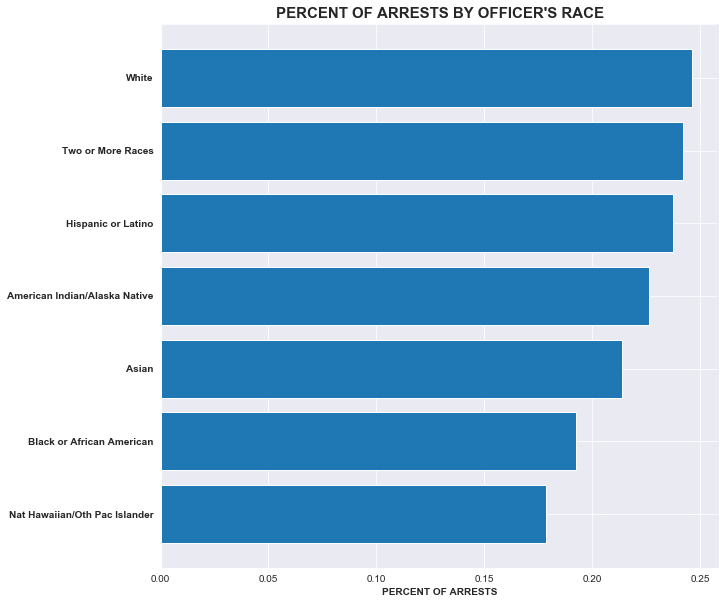

In [21]:
off_race_arrest = df[df.stop_resolution == 'Arrest'].off_race.value_counts()
off_race_total = df.off_race.value_counts()
off_race_arrest_pct = (off_race_arrest/off_race_total).sort_values(ascending=True)

plt.figure(figsize=(10,10))
plt.title('PERCENT OF ARRESTS BY OFFICER\'S RACE', fontsize=15, fontweight='bold')
plt.barh(off_race_arrest_pct.index, off_race_arrest_pct.values)
plt.xlabel('PERCENT OF ARRESTS', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

---

# SUBJECTS INFO

---

In [22]:
stops_subj_race = df.subj_perceived_race.value_counts().sort_values(ascending=True)
subj_labels = ['Multi-Racial', 'White', 'Hispanic', 'Native Hawaiian or Other Pacific Islander', 'Black or African American', 'Asian','American Indian or Alaska Native']
seattle_pop = [.068,.68,.066,.003,.07,.15,.006]
pct_stops_subj_race = stops_subj_race/stops_subj_race.sum()

print('{}\n{}\n{}'.format('NUMBER OF MISSING SUBJECT RACE VALUES', 42566 - stops_subj_race.sum(), '---'*15))
print('{}\n{}'.format('SEATTLE\'S POPULATION BY RACE', '---'*15))
for l, p in zip(subj_labels, seattle_pop):
    print(l + ':', p)

NUMBER OF MISSING SUBJECT RACE VALUES
3906
---------------------------------------------
SEATTLE'S POPULATION BY RACE
---------------------------------------------
Multi-Racial: 0.068
White: 0.68
Hispanic: 0.066
Native Hawaiian or Other Pacific Islander: 0.003
Black or African American: 0.07
Asian: 0.15
American Indian or Alaska Native: 0.006


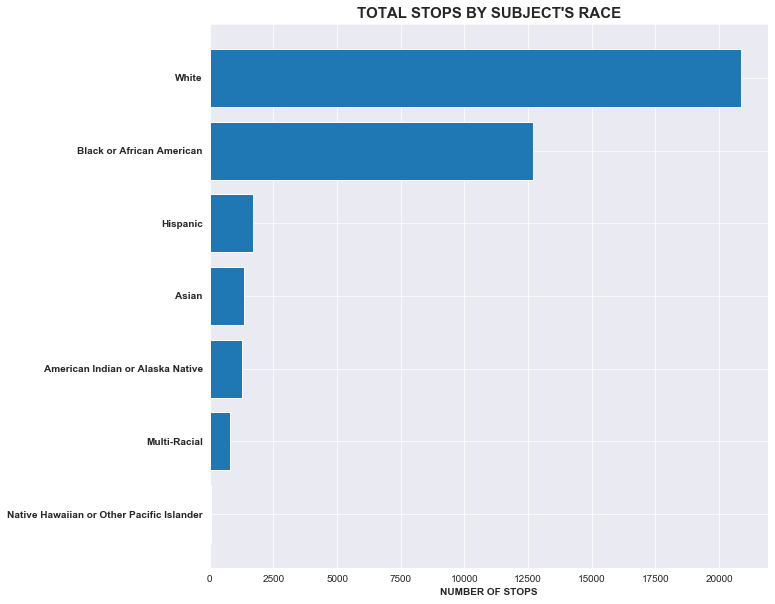

In [23]:
plt.figure(figsize=(10,10))
plt.title('TOTAL STOPS BY SUBJECT\'S RACE', fontweight='bold', fontsize=15)
plt.barh(stops_subj_race.index, stops_subj_race.values)
plt.yticks(fontweight='bold')
plt.xlabel('NUMBER OF STOPS', fontweight='bold')
plt.show()

The graph below shows us how that there is roughly a 25% chance that, no matter what race you are, your stop will lead to an arrest.

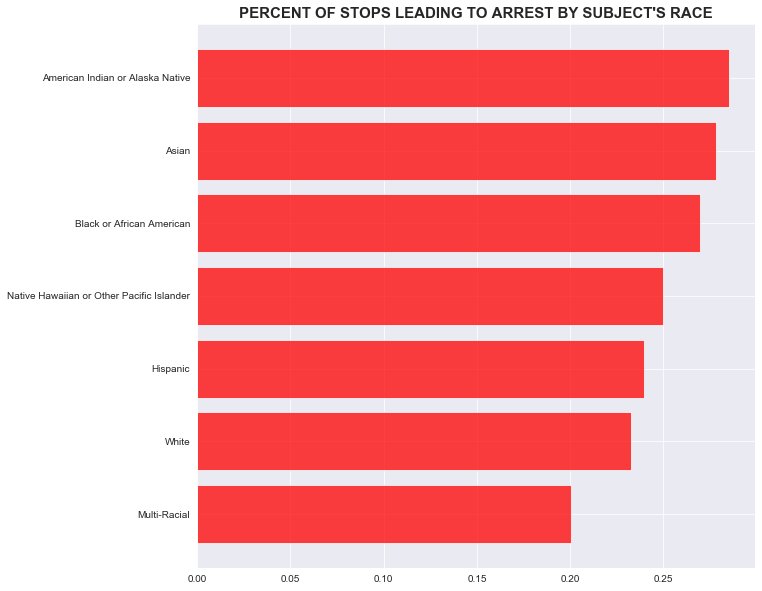

In [204]:
arrest_subj_race = df[df.stop_resolution == 'Arrest'].subj_perceived_race.value_counts().sort_values(ascending=False)
pct_arrest_subj_race = (arrest_subj_race/stops_subj_race).sort_values()

plt.figure(figsize=(10,10))
plt.barh(pct_arrest_subj_race.index, pct_arrest_subj_race.values, alpha=0.75, color='red')
plt.title('PERCENT OF STOPS LEADING TO ARREST BY SUBJECT\'S RACE', fontweight='bold', fontsize=15)
plt.show()

The plot below shows us the percent of total stops against each race's percent of Seattle's population. We can see that for Blacks and American Indian/Alaskan Natives there is a large gap in the frequency that they are getting stopped versus their population percentage. For Asians there appears that there is a strong inverse correlation between how often they are stopped versus their population percentage.

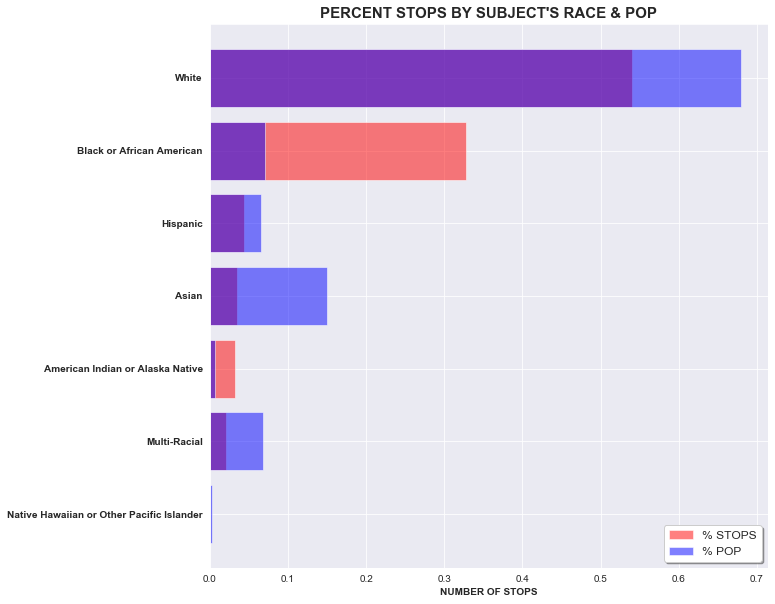

In [25]:
plt.figure(figsize=(10,10))
plt.title('PERCENT STOPS BY SUBJECT\'S RACE & POP', fontweight='bold', fontsize=15)
plt.barh(pct_stops_subj_race.index, pct_stops_subj_race.values, alpha=0.5, color='red')
plt.barh(subj_labels, seattle_pop, alpha=0.5, color='blue')
plt.yticks(fontweight='bold')
plt.xlabel('NUMBER OF STOPS', fontweight='bold')
plt.legend(['% STOPS', '% POP'], loc='lower right', shadow=True, facecolor='white', fontsize='large')
plt.show()

---

# Weapons found in stops

---

------------------------------------------------------------
MISSING VALUES: 7589 of 42566 which = 17.82%
------------------------------------------------------------


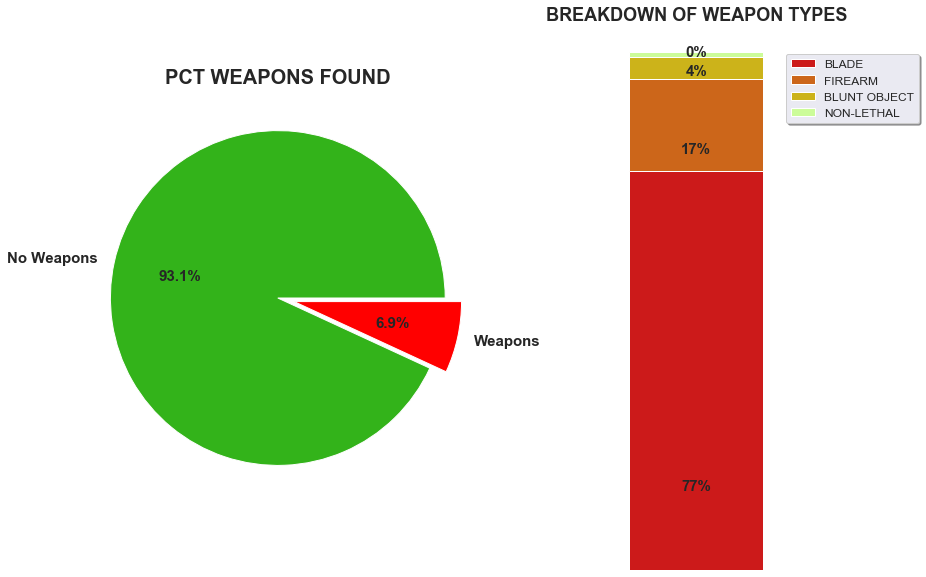

In [205]:
print('{}\n{} {} {} {} {} {}\n{}'.format('---'*20, 'MISSING VALUES:', df.weapon.isna().sum(), 'of', df.shape[0], 'which =', '17.82%','---'*20))

# make figure and assign axis objects
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = list([32569, df.weapon.value_counts().values[1:].sum()])
labels = ['No Weapons', 'Weapons']
explode = [0,0.1]
angle = 0
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode, colors=[(.2,.7,.1), 'red'],
        textprops={'fontsize': 15, 'weight':'bold'})
ax1.set_title('PCT WEAPONS FOUND', fontdict={'weight':'bold','fontsize':20})

# bar char parameters
xpos = 0
bottom = 0
ratios = [.7703, .17732, .04360, .00872]
colors = [[.8, .1, .1], [.8, .4, .1], [.8, .7, .1], [.8, .99, .6]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, bottom=bottom, color=colors[j]) # width bottom=bottom
    ypos = bottom + ax2.patches[j].get_height() / 5
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100), ha='center', 
             fontsize=15, fontweight='bold')

ax2.set_title('BREAKDOWN OF WEAPON TYPES', fontweight='bold', fontsize=18)
ax2.legend(('BLADE', 'FIREARM', 'BLUNT OBJECT', 'NON-LETHAL'), fontsize='large', 
            shadow=1, bbox_to_anchor=(0.7, 0.96))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

plt.show()

---